# Imports 

Aim: Beamsplitters vs time plots

In [36]:
print('hi')

done
hi


In [37]:
%matplotlib inline
import os
import sys
import inspect
import numpy as np
from scipy.special import factorial
import h5py

#data_path = '/data'     ... data path specified later
#data_path
#initial_pulse = '../pulses/example_pulses/transmon_cat_initial_pulse.h5'
from h5py import File
import matplotlib.pyplot as plt
from pylab import*
from qutip import*

from scipy import interpolate
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


In [38]:
sys.path.append(r'C:\_Lib\python\quantum-optimal-control')

In [39]:
from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape
from quantum_optimal_control import*

In [40]:
from IPython.display import clear_output

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# 3DMM2 parameters

In [42]:
# chi = Peak splitting MHz
chis = array([-33, -33]) 
kappas  = array([0,0]) # kHz

# Multimode circle grape

In [43]:
#TODO: Figure out why relative import doesn't work
sys.path.append(r'C:\_Lib\python\Multimode-Conditional-Displacements\hpc_runs\multimode_circle_grape\class_description')
from circle_grape_v4 import *

In [44]:
transmon_levels = 2

# Data Storage

In [45]:
import pandas as pd
fname = 'beam_splitters'
columns=['time', 'steps','alpha', 'detuning', 'qubit_drive_amp','err', 'filenum']#total_time, steps, alpha, detuning,  qubit_drive_amp, err, filenum
df = None

# Main

In [46]:
fock_states = [1,2,3,4,5 ] 
times = [1000 + (500*i) for i in range(4) ] #Ghz

In [47]:
states_forbidden_list = []

convergence = {'rate': 0.1, 'update_step': 20, 'max_iterations': 250,
               'conv_target': 1e-3, 'learning_rate_decay': 500.0}




initial_guess = None

In [48]:
data_path ='' #'C:/Users/Chakram_Meas/Documents/GitHub/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/Grape on multiple modes/Data'

In [49]:
def main(fname = fname, df = df):
    '''
    Vary time length, get fidelity
    '''
    filenum = 0

    for fock in fock_states:
        for time in times:

            clear_output(wait = True)
            total_time = time
            steps = int(time/2)
            alpha = 30
            
            detuning = 0.01
            qubit_drive_amp = 0.01
            #param

            mode = 2
            mode_levels = 10
            chi,kappa = chis[:mode],kappas[:mode]
            chi = [i*1e-6 for i in chi]
            kappa = [i*1e-6 for i in kappa]
            circle_grape_params = {"chis":chi,"kappas":kappa,"alpha":alpha,"delta_c":detuning}


            reg_coeffs = {'dwdt': 0.1, 'd2wdt2': 1.0e-3, 'forbid_dressed': False,
                          'states_forbidden_list':states_forbidden_list,
                          'forbidden_coeff_list': [1.0*steps] * len(states_forbidden_list)}

            op = multimode_circle_grape_optimal_control(mode_state_num = mode_levels,
                                                        number_of_modes = mode,hparams = circle_grape_params,add_disp_kerr=False)



            #qubit_drive_amp = drive_amp # Ghz
            ss = op.run_optimal_control(state_transfer = True, initial_states = [fock], target_states = [mode_levels*fock], 
                            total_time = total_time, steps = steps,max_amp = qubit_drive_amp, 
                            taylor_terms = None,is_dressed=False, 
                            convergence = convergence, reg_coeffs =  reg_coeffs,
                            plot_only_g = True,
                            states_forbidden_list = states_forbidden_list,initial_guess = initial_guess, 
                            file_name="beamsplitter_data" + str(filenum), data_path=data_path, save = True)
            hf = op.openfile()
            err  = min(hf['error'])
            if np.isnan(err):
                err = -1
            df_new = pd.DataFrame([[total_time, steps, alpha, detuning,  qubit_drive_amp, err, filenum]], columns=columns)
            if df is None : 
                df = df_new
            else:
                df = df.append(df_new, ignore_index = True)
            df.to_csv(fname, index=False)
            filenum+=1
    clear_output(wait = True)

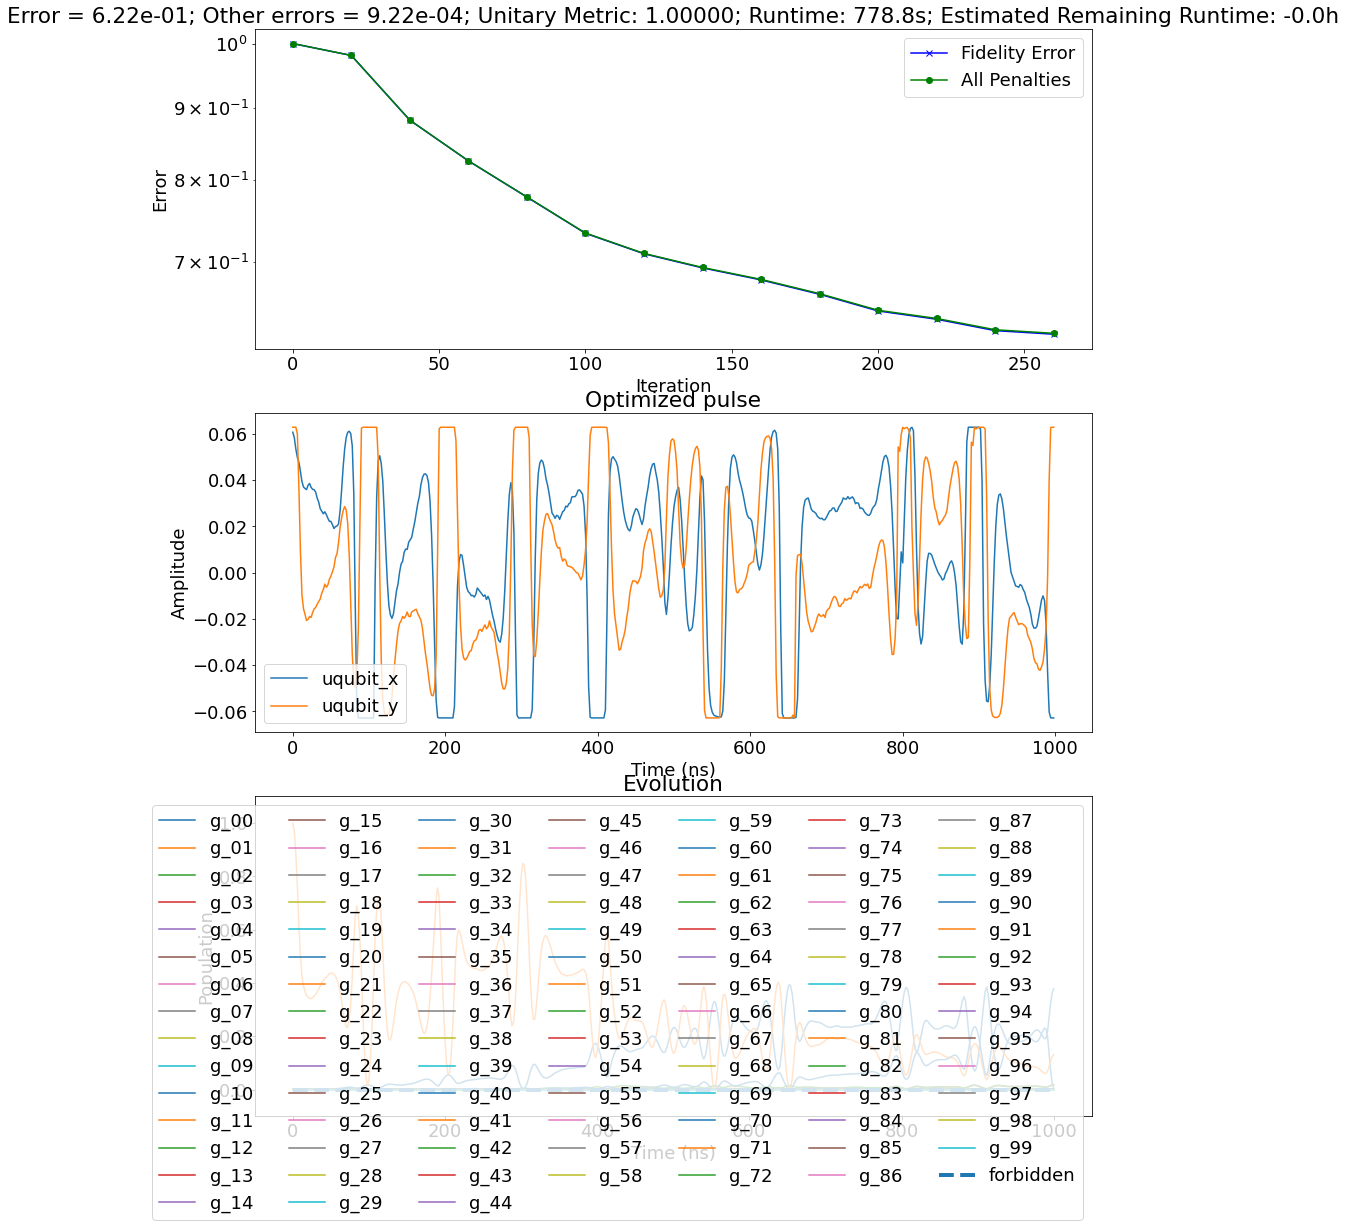

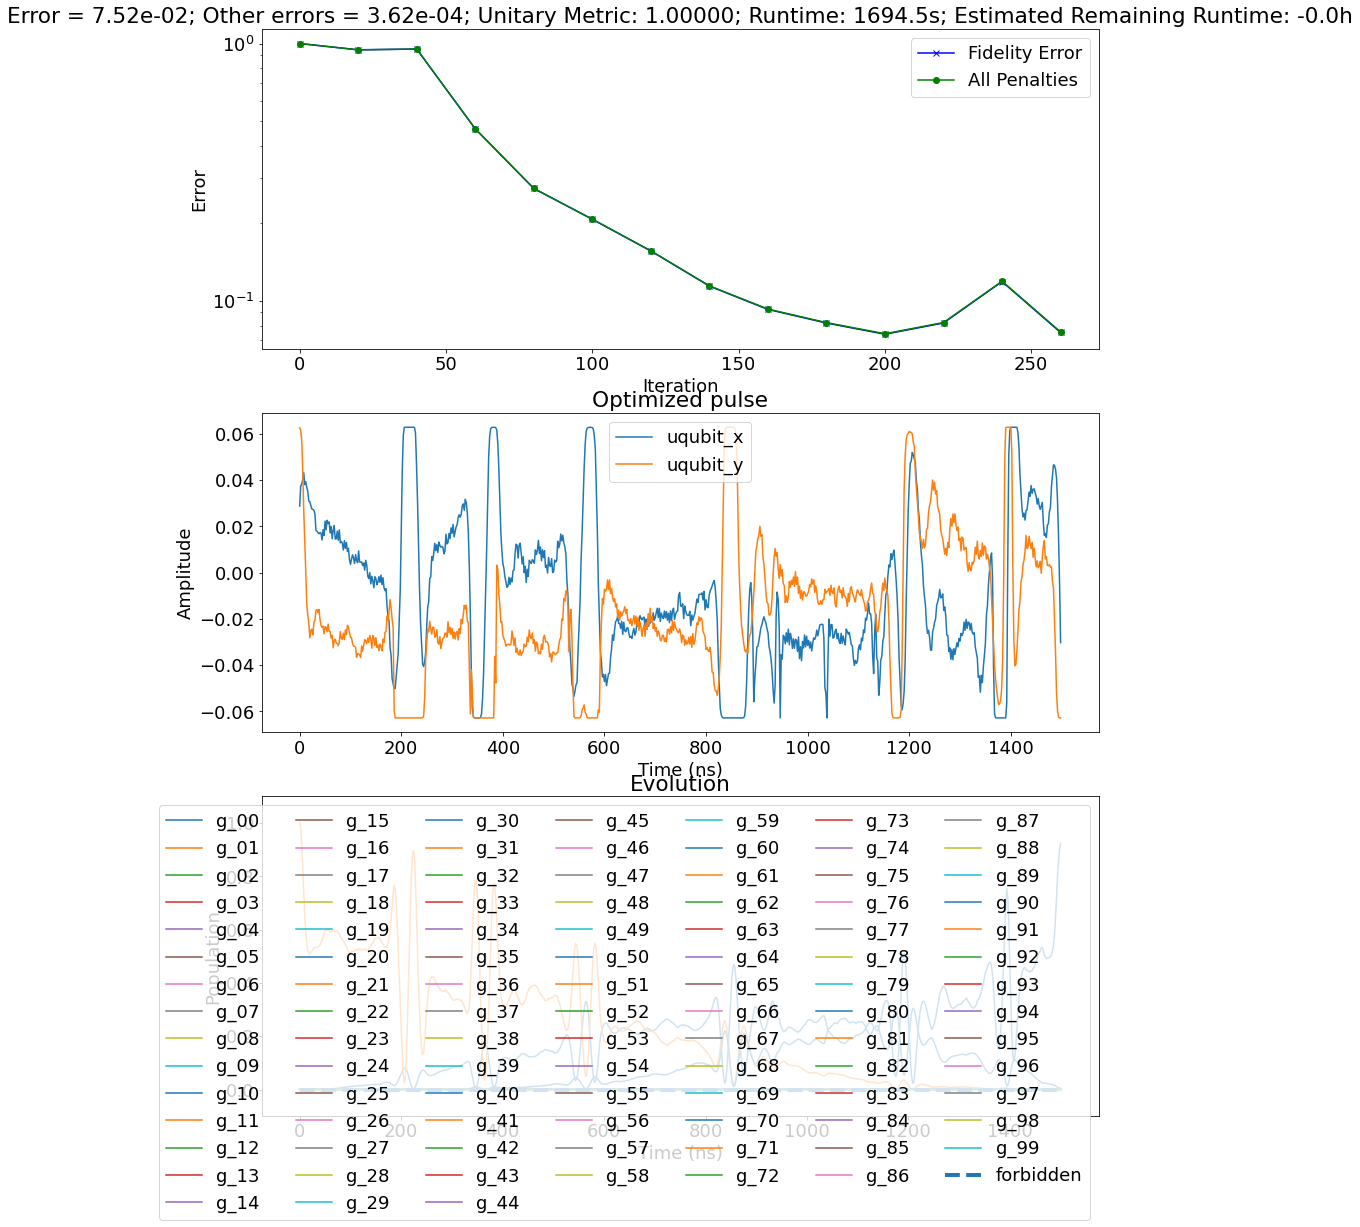

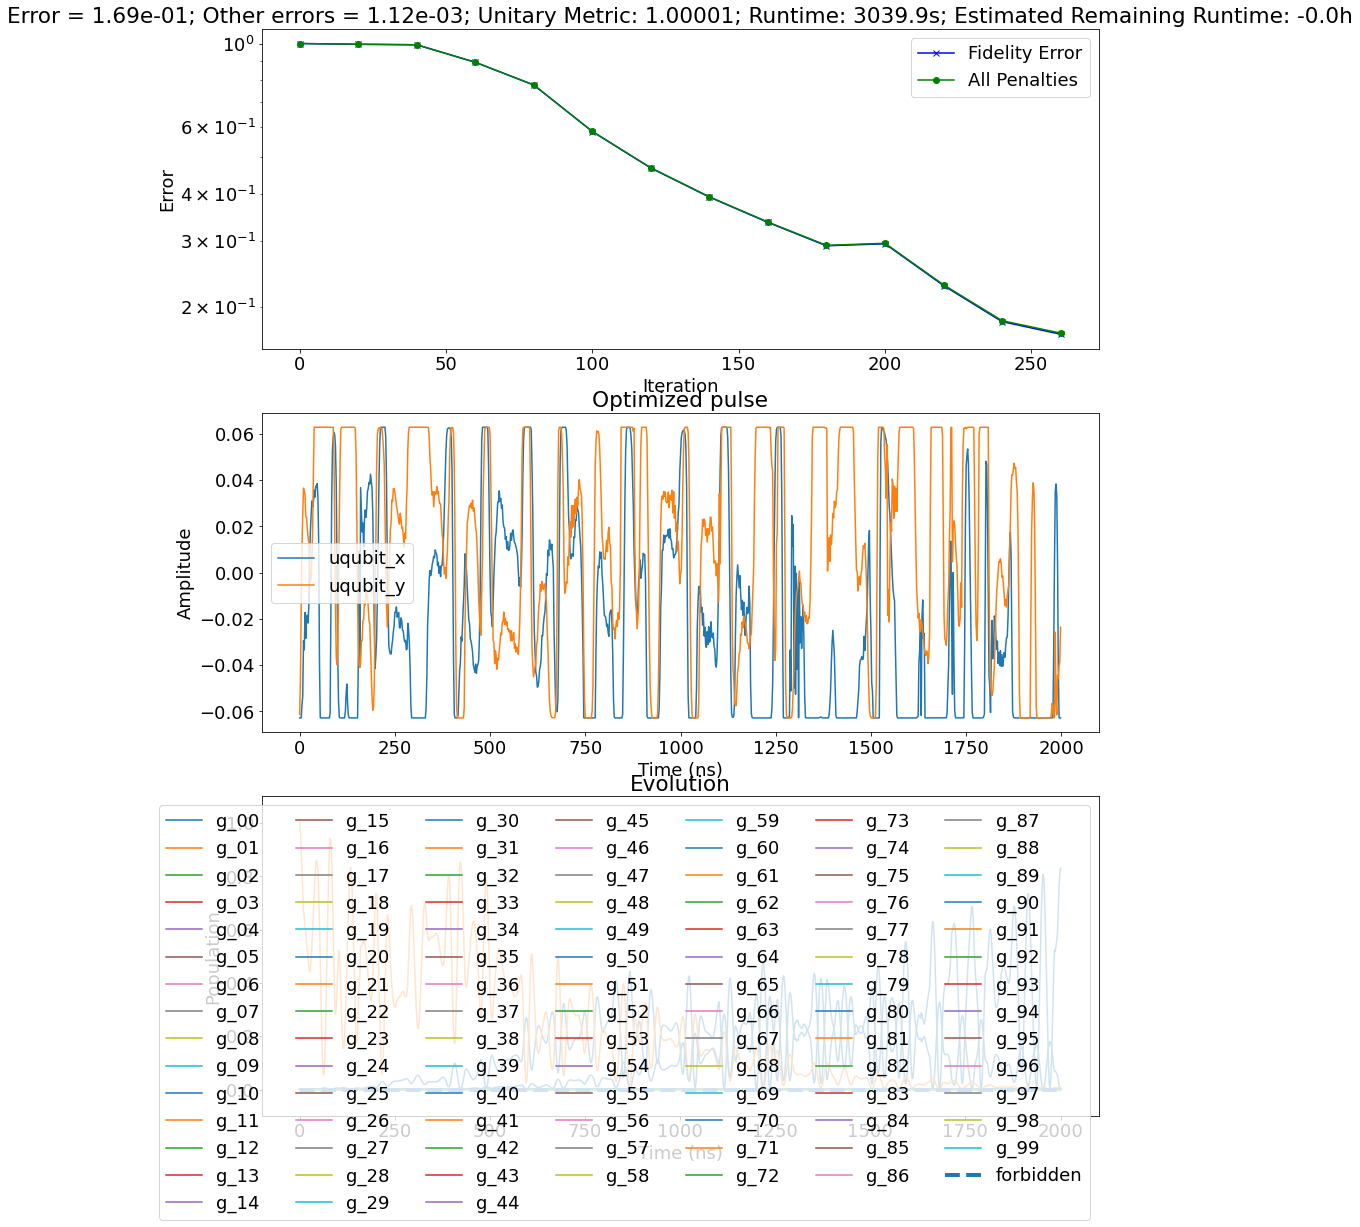

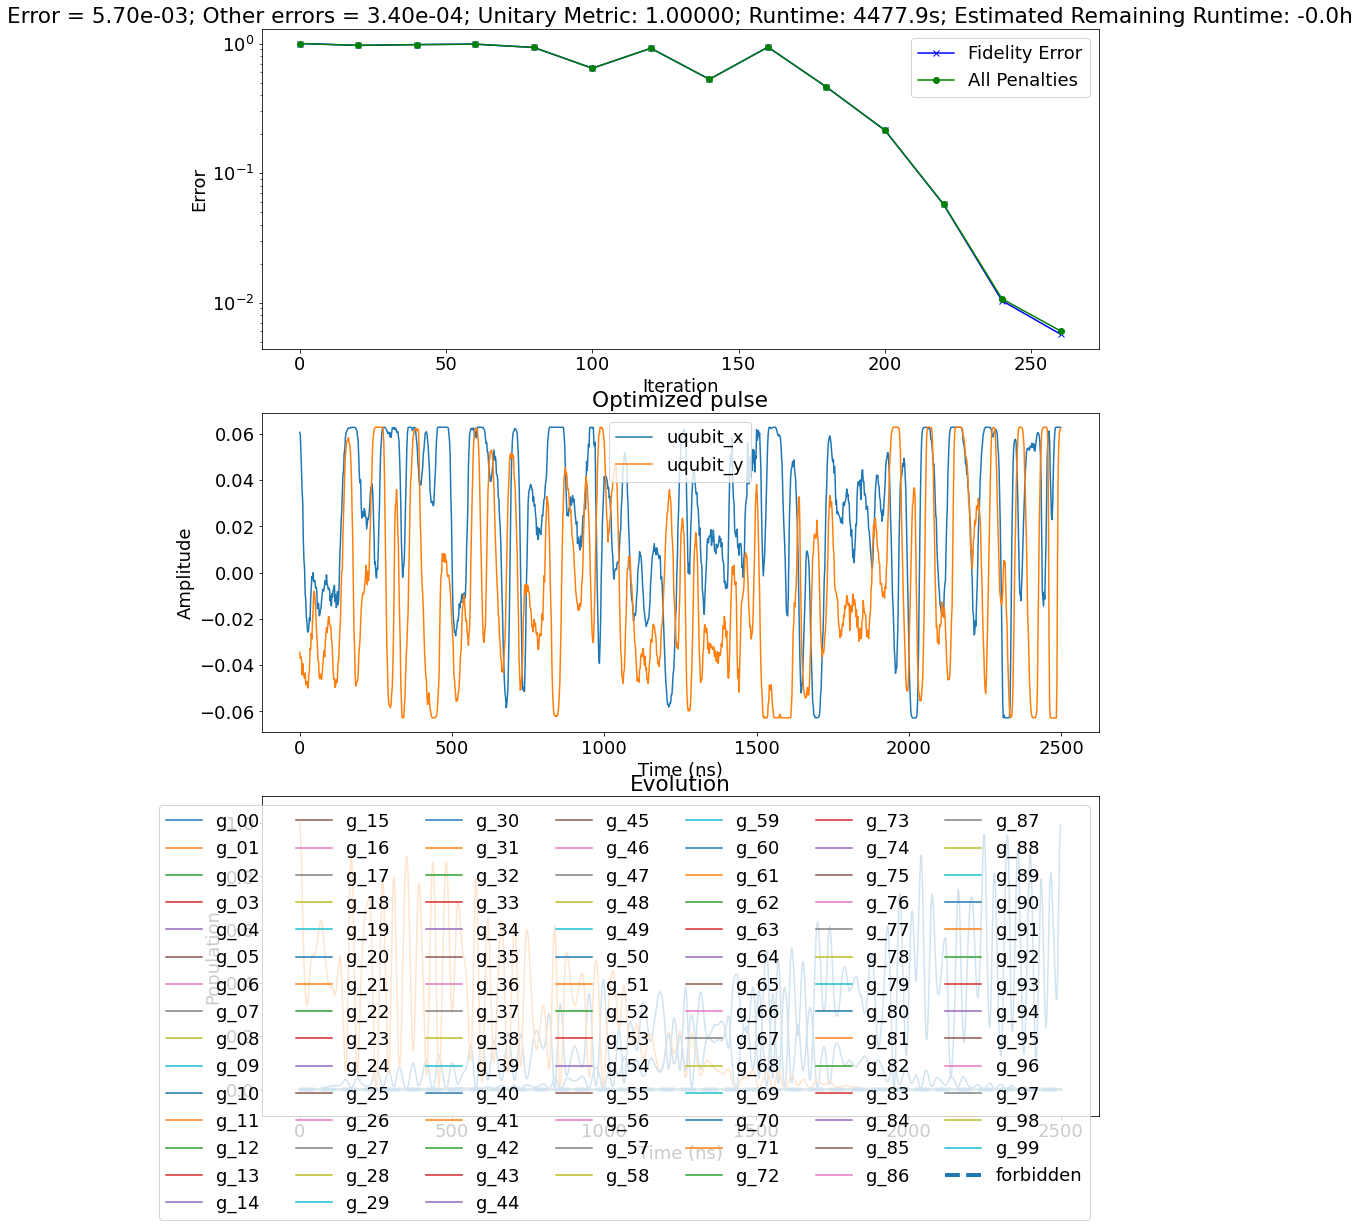

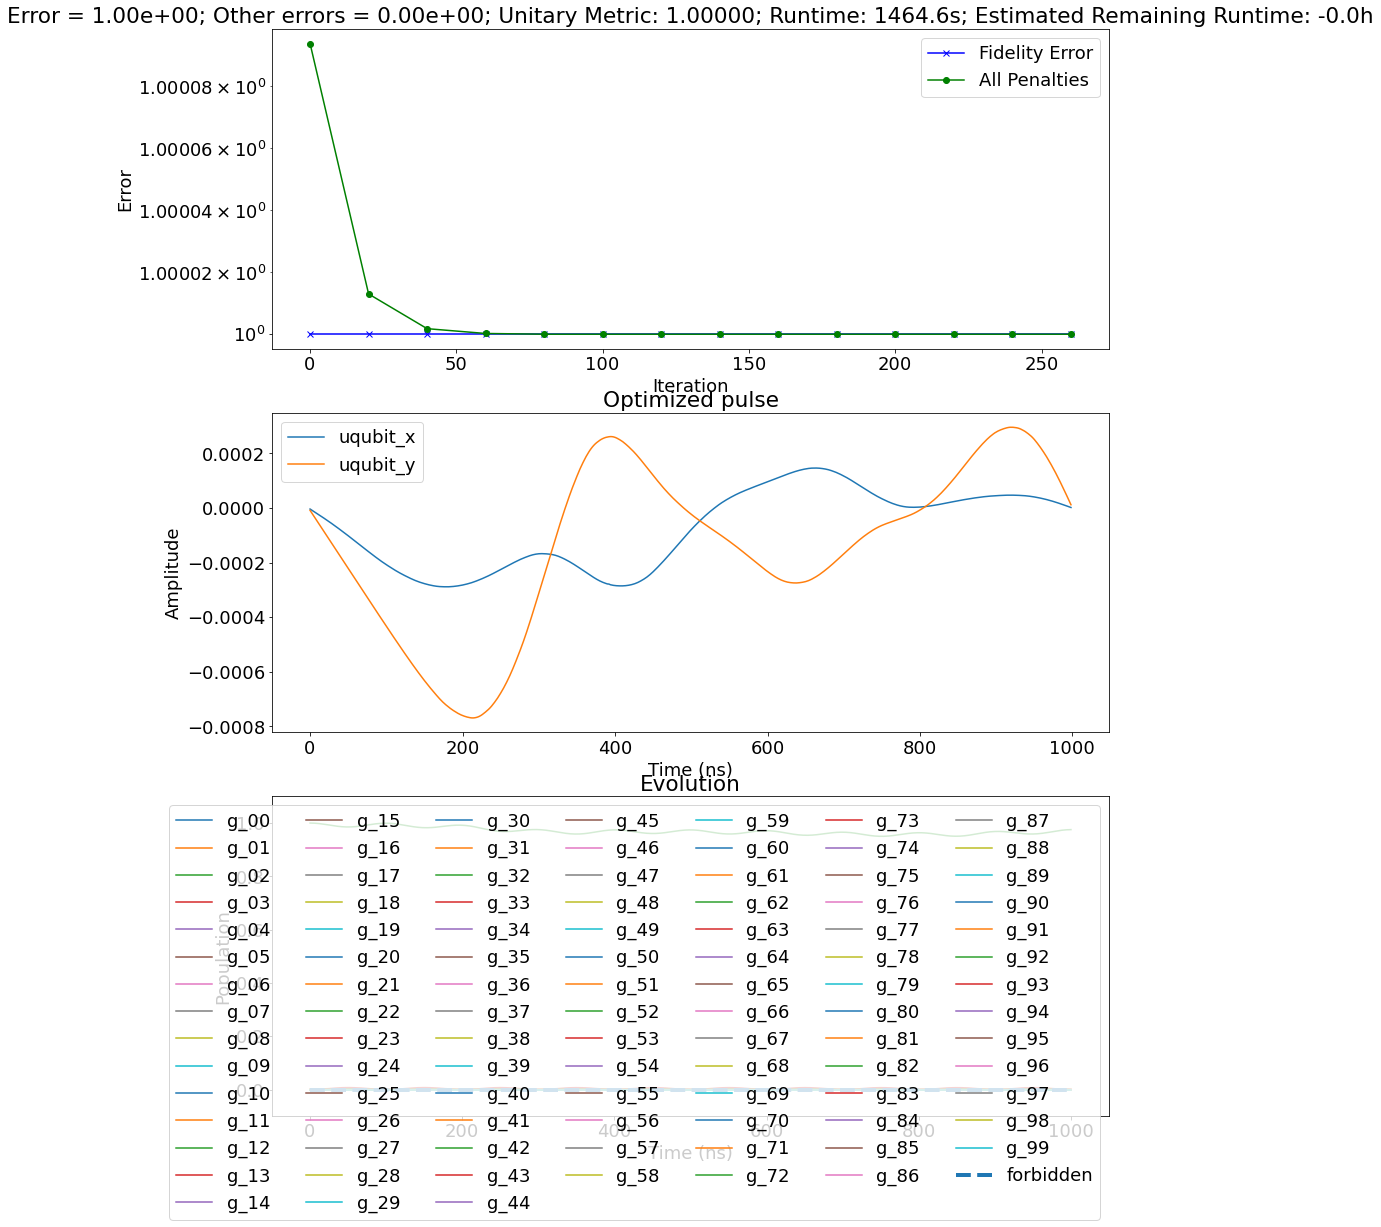

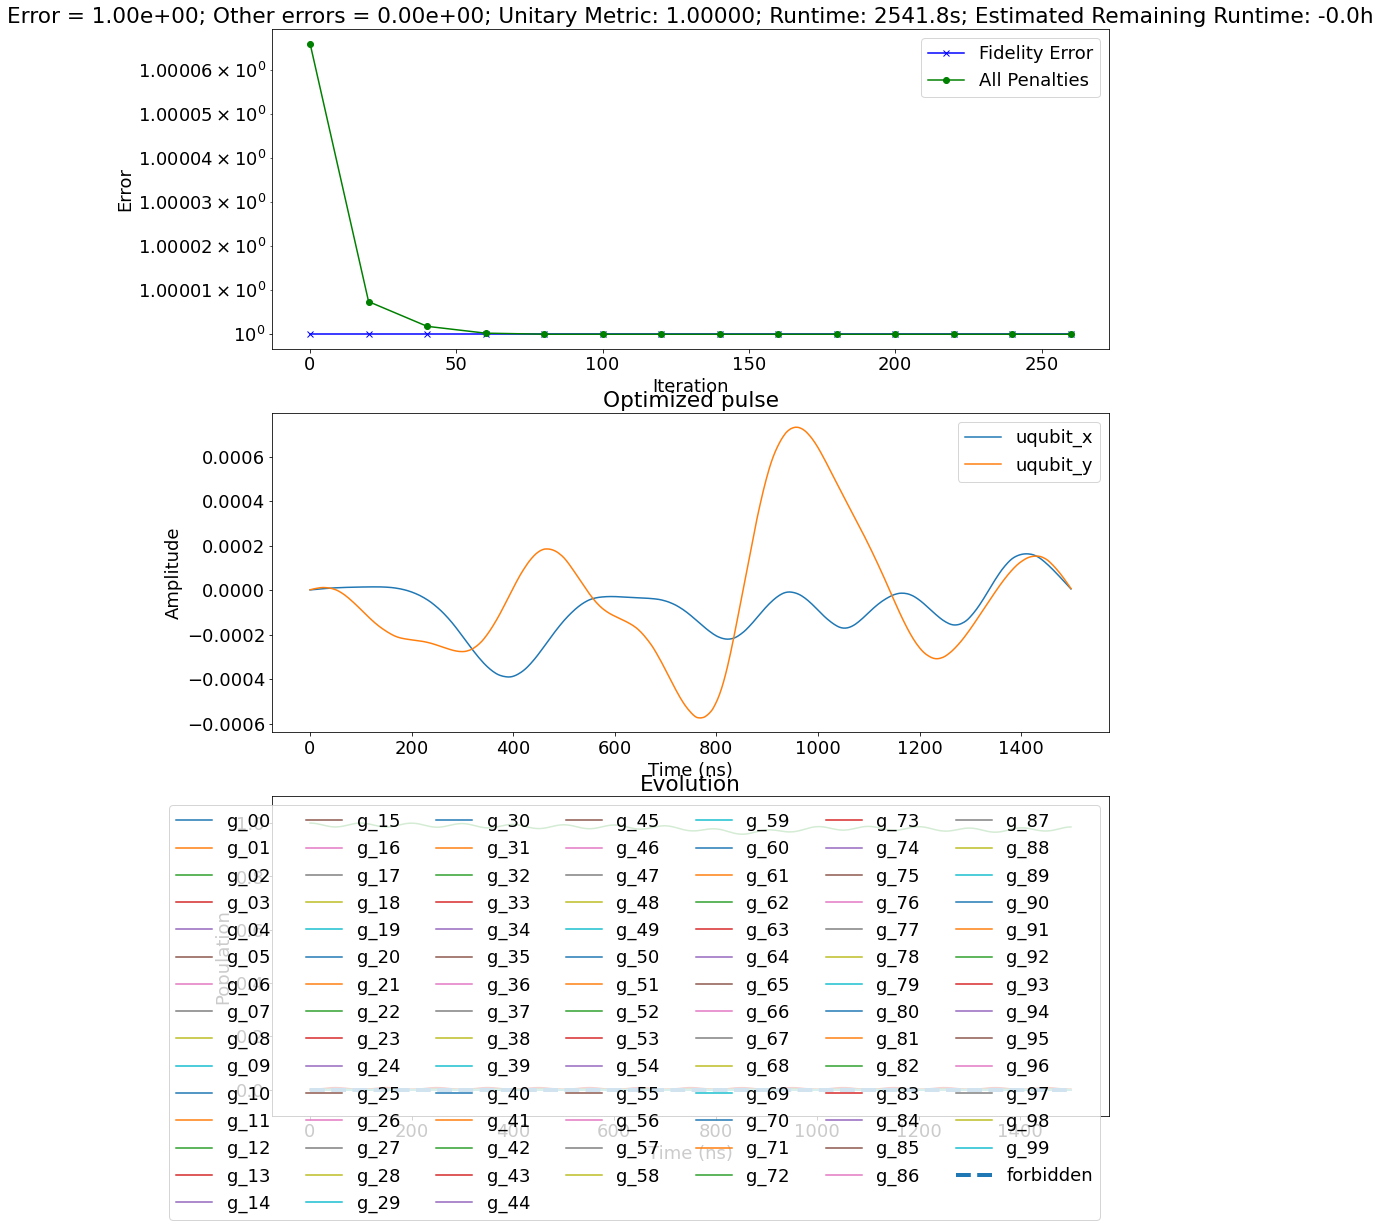

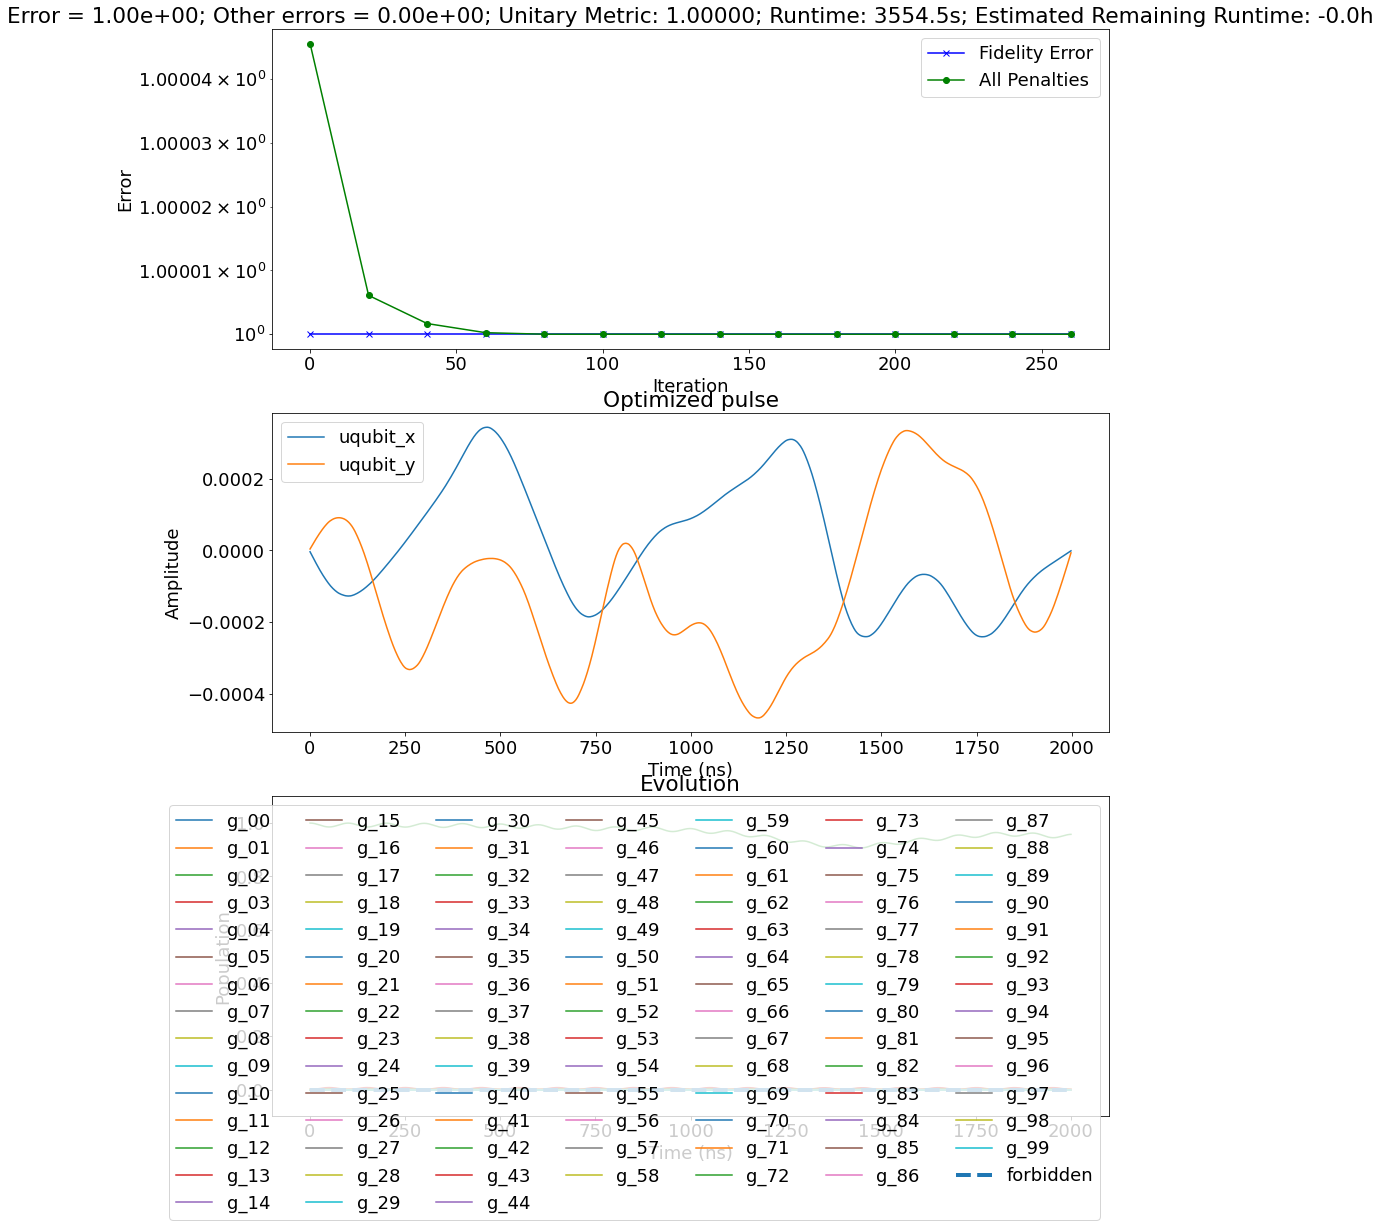

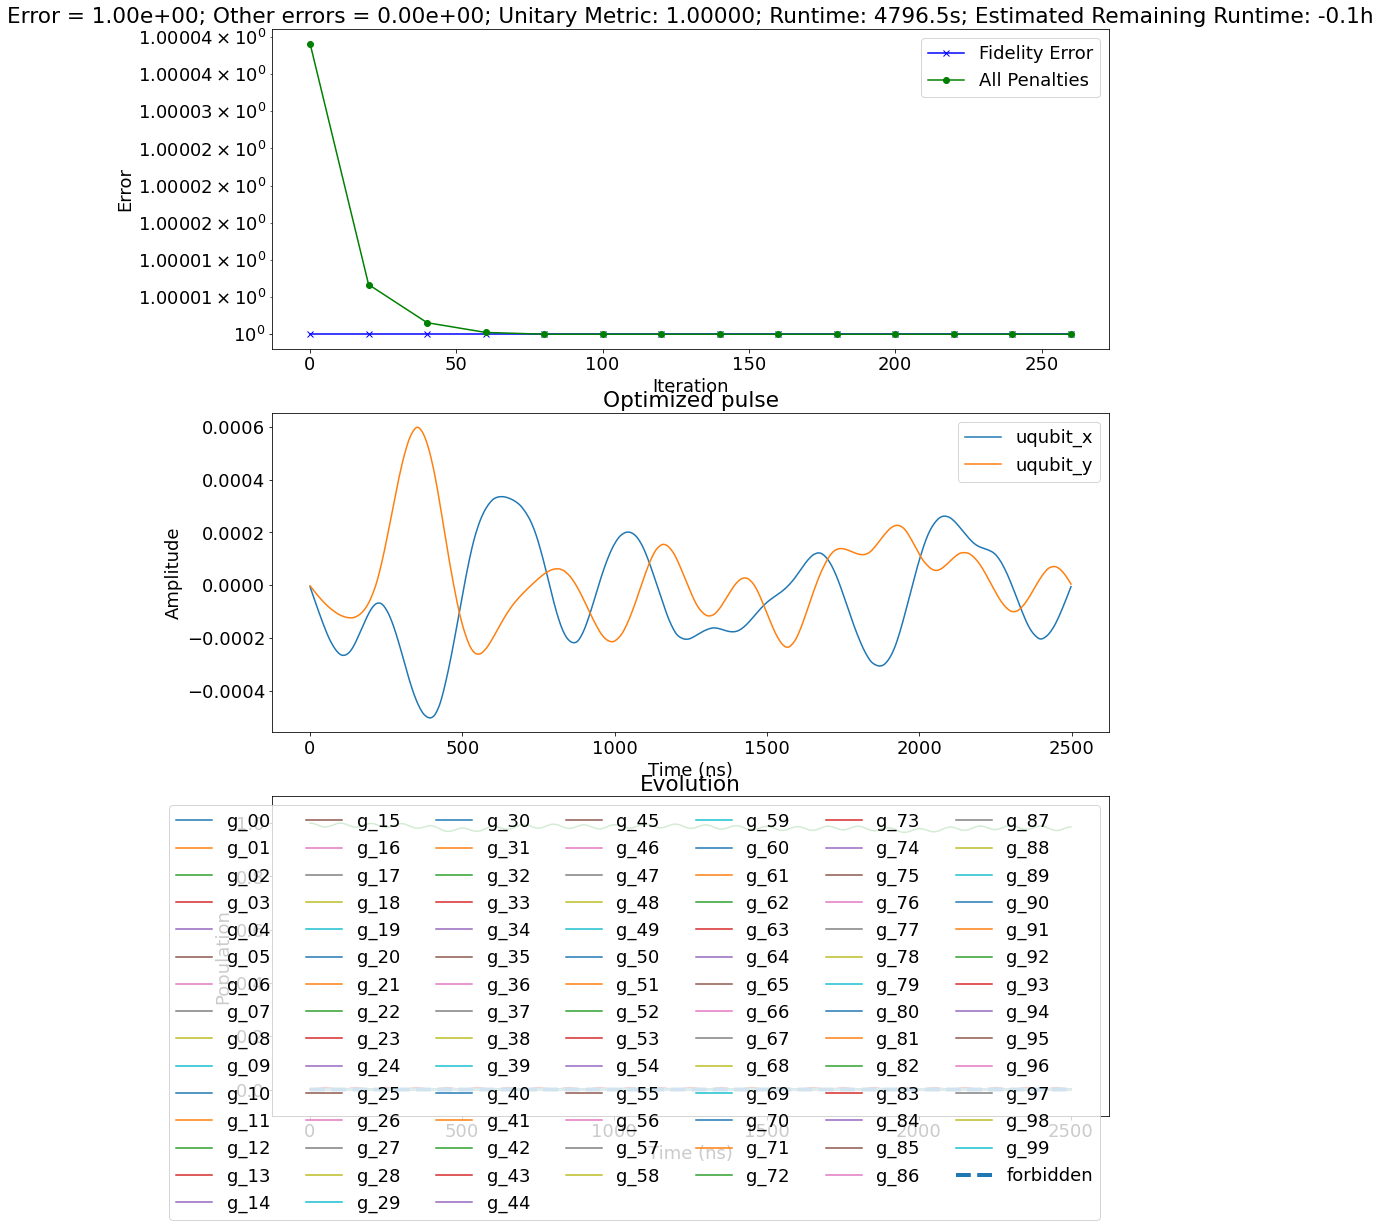

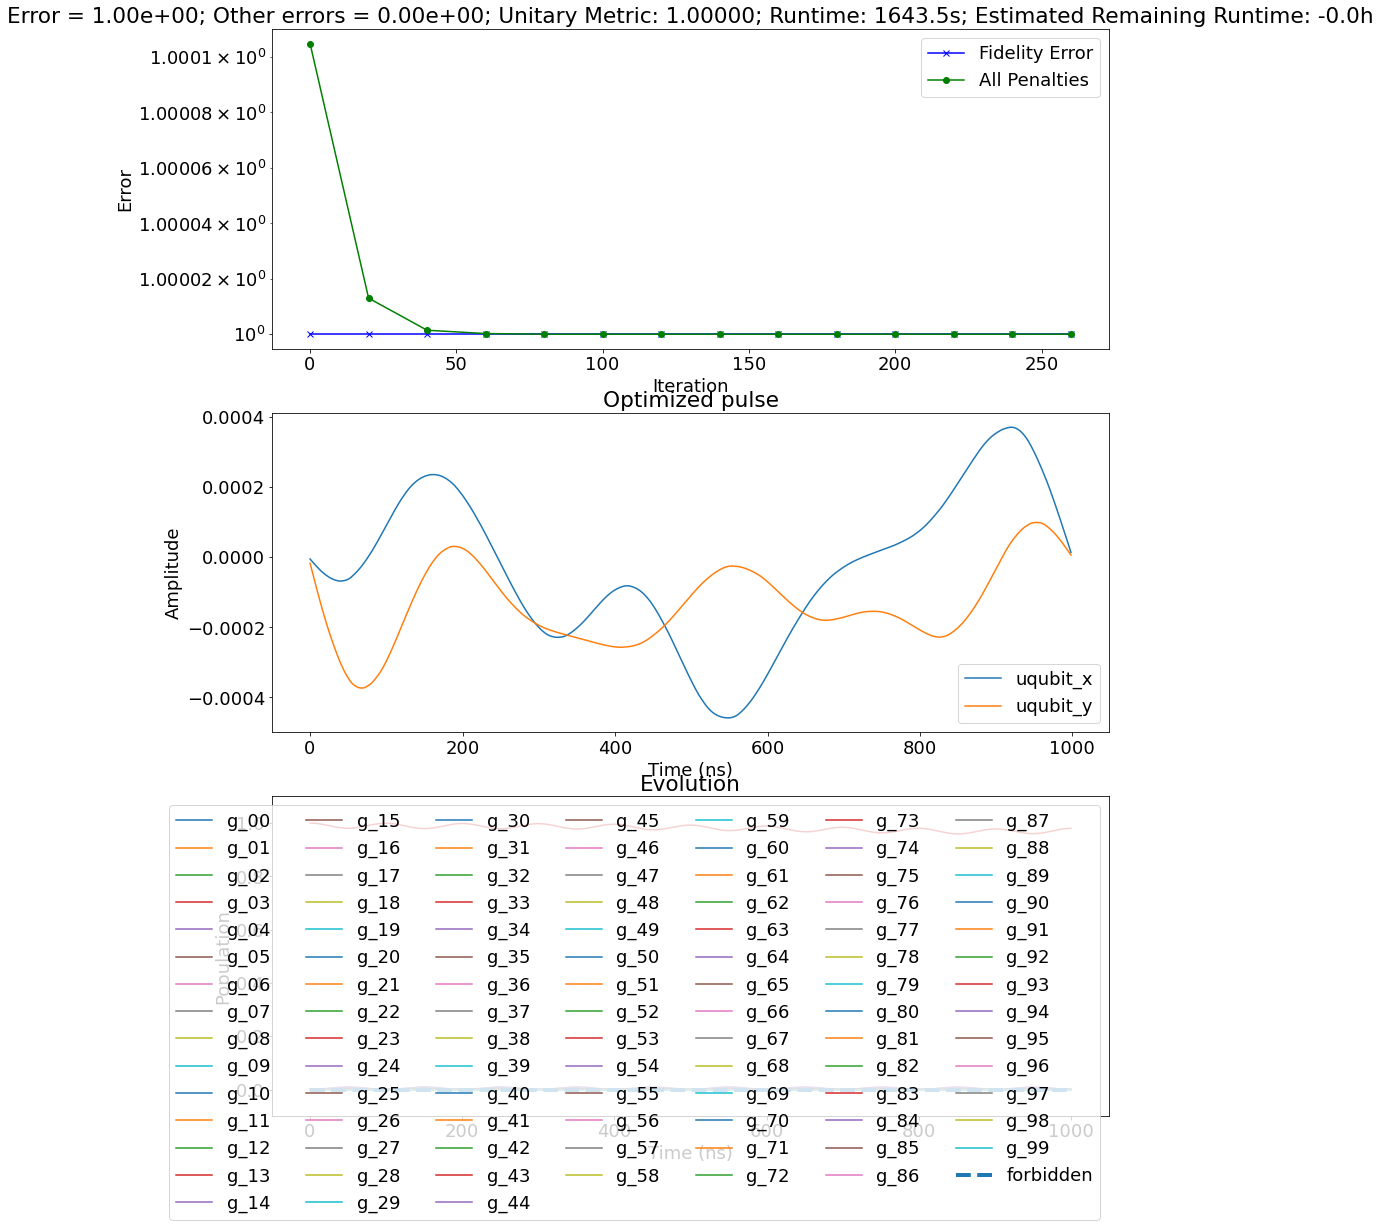

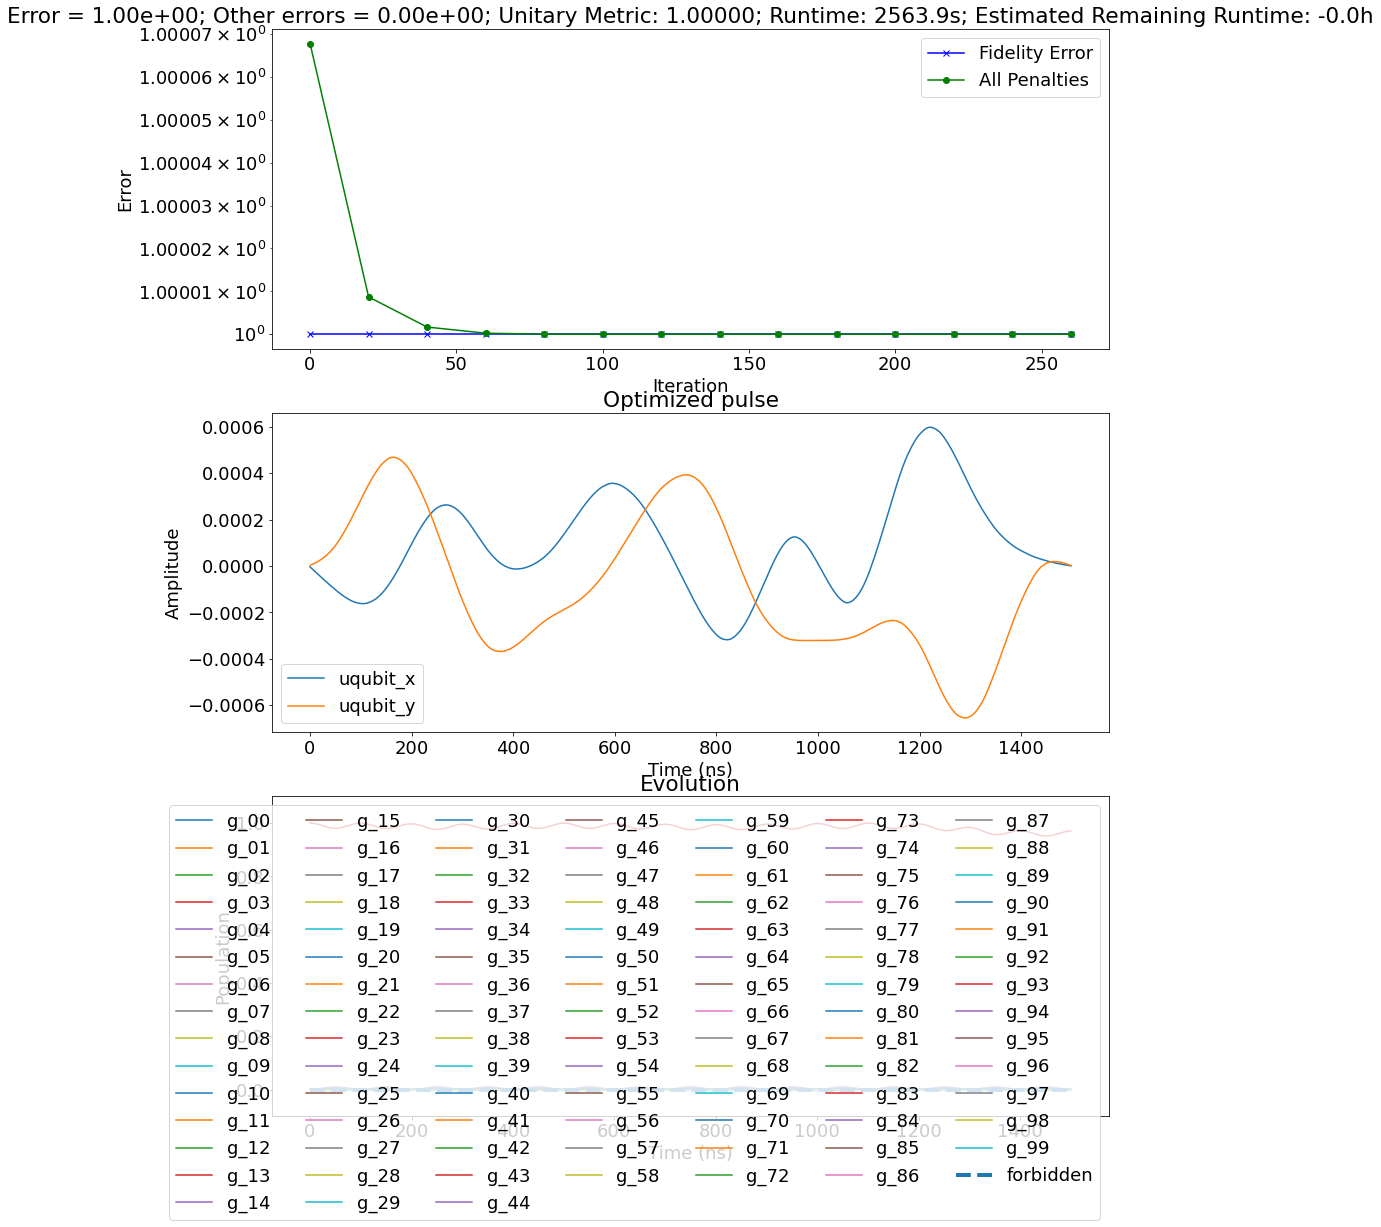

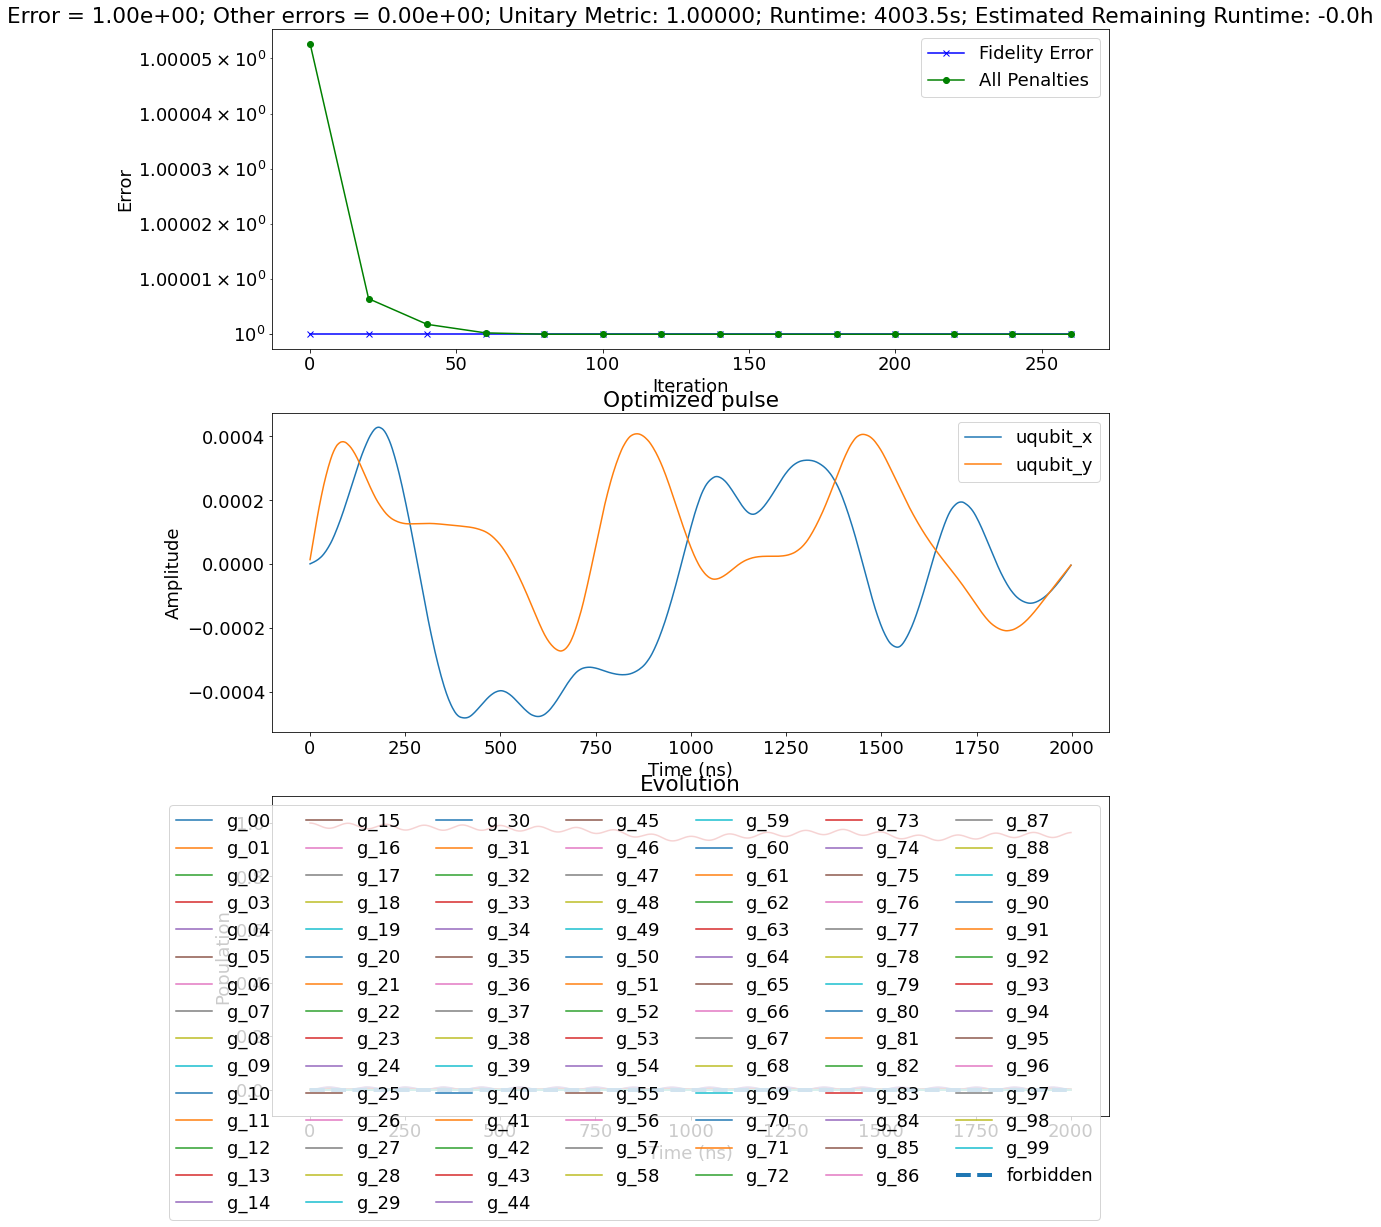

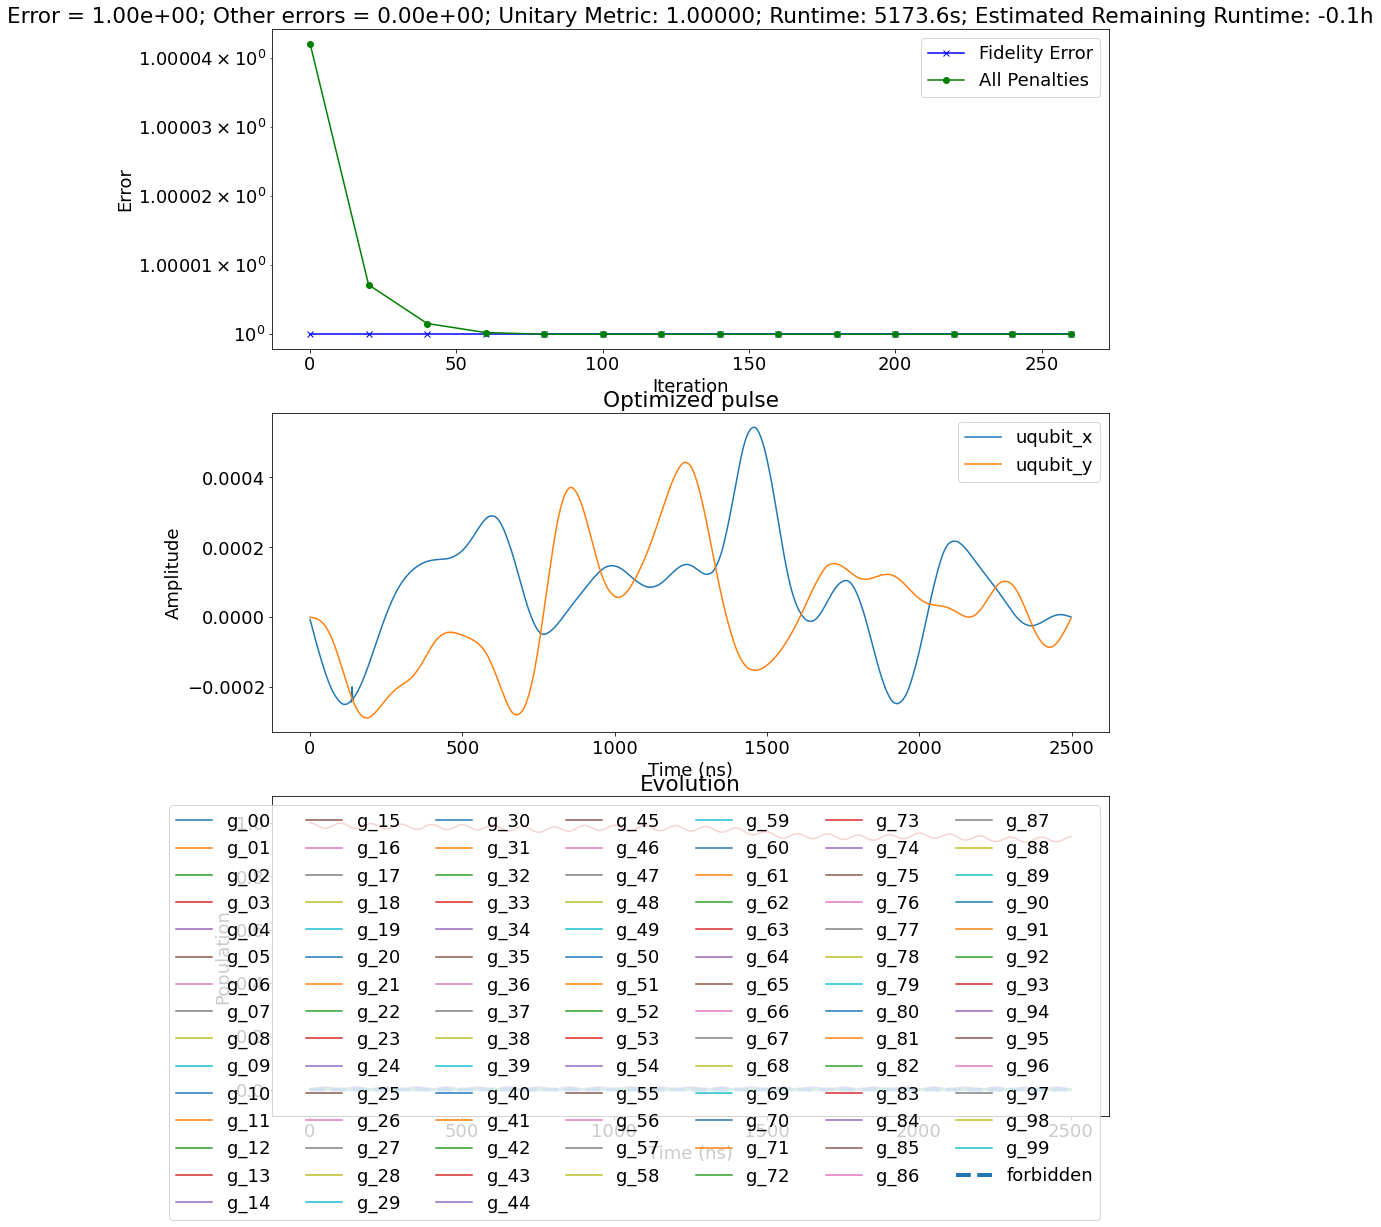

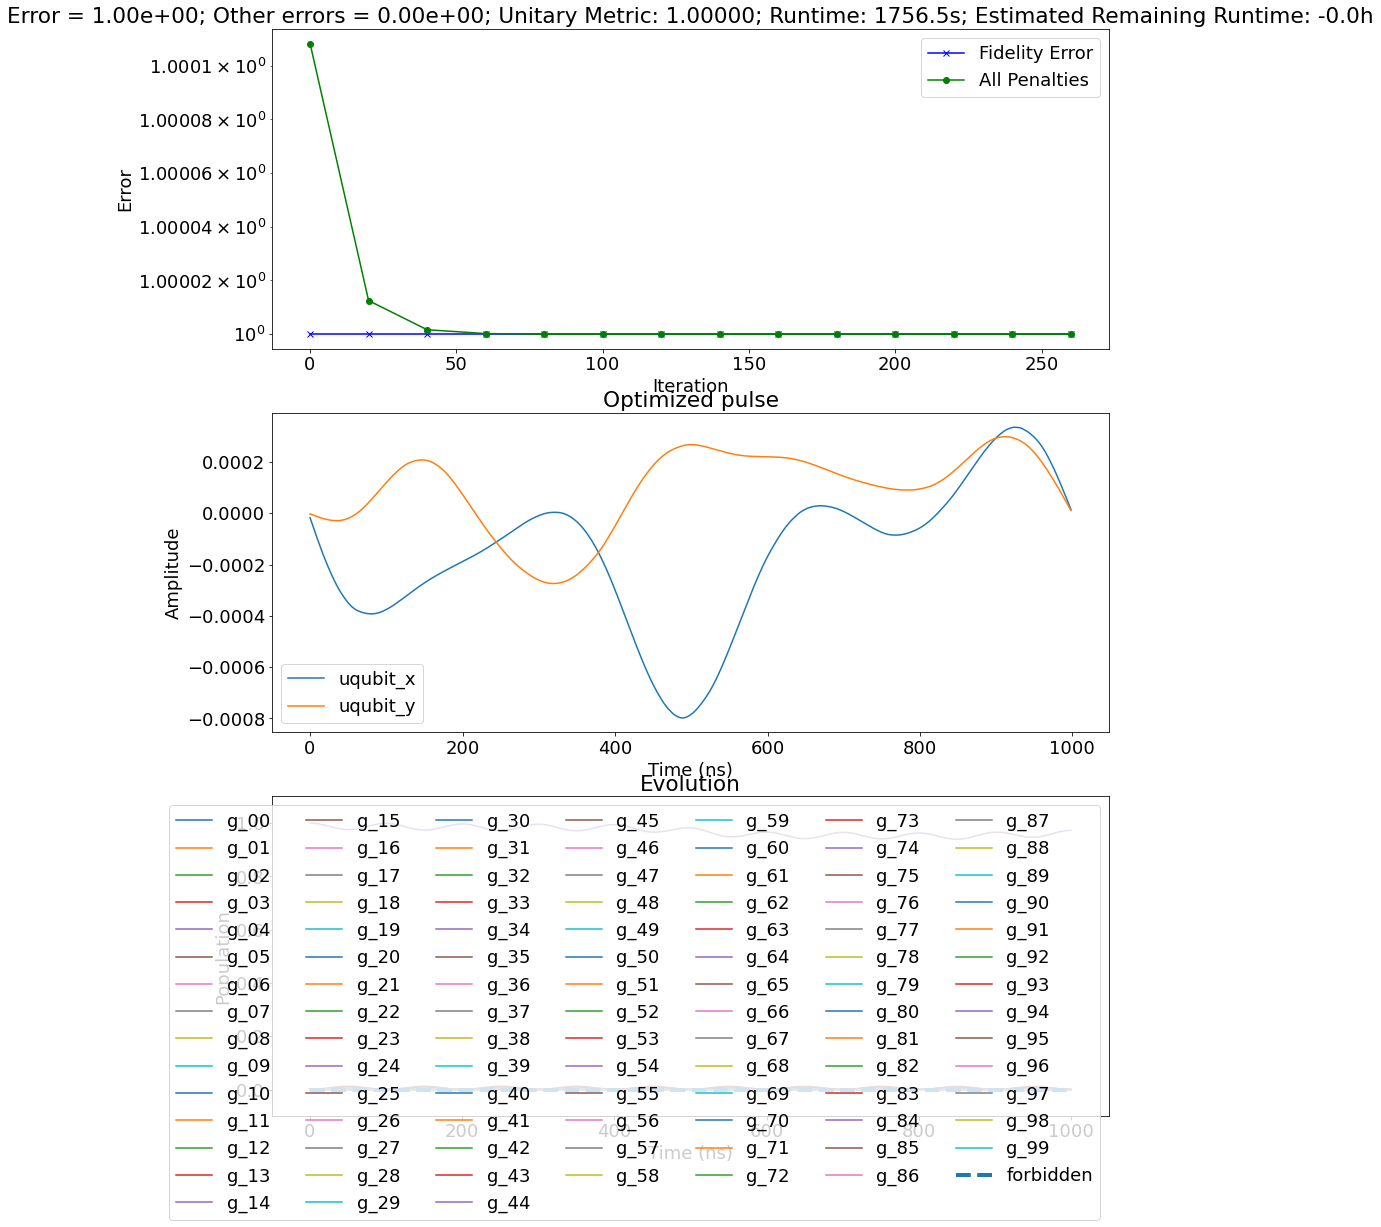

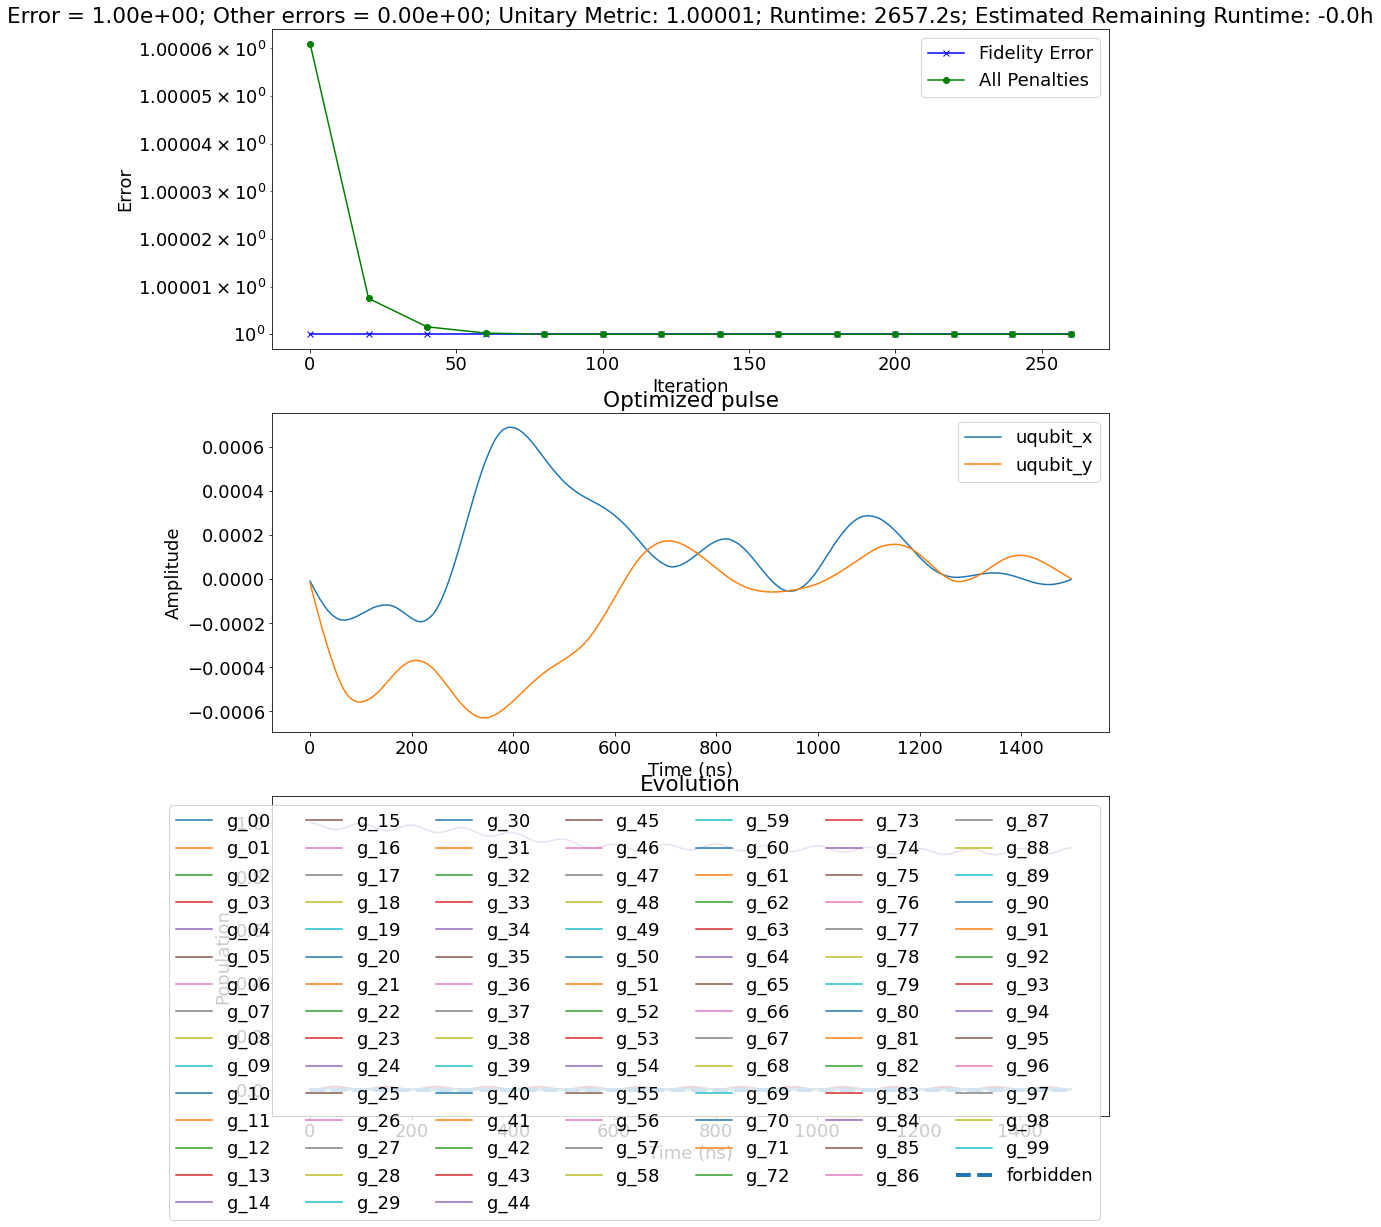

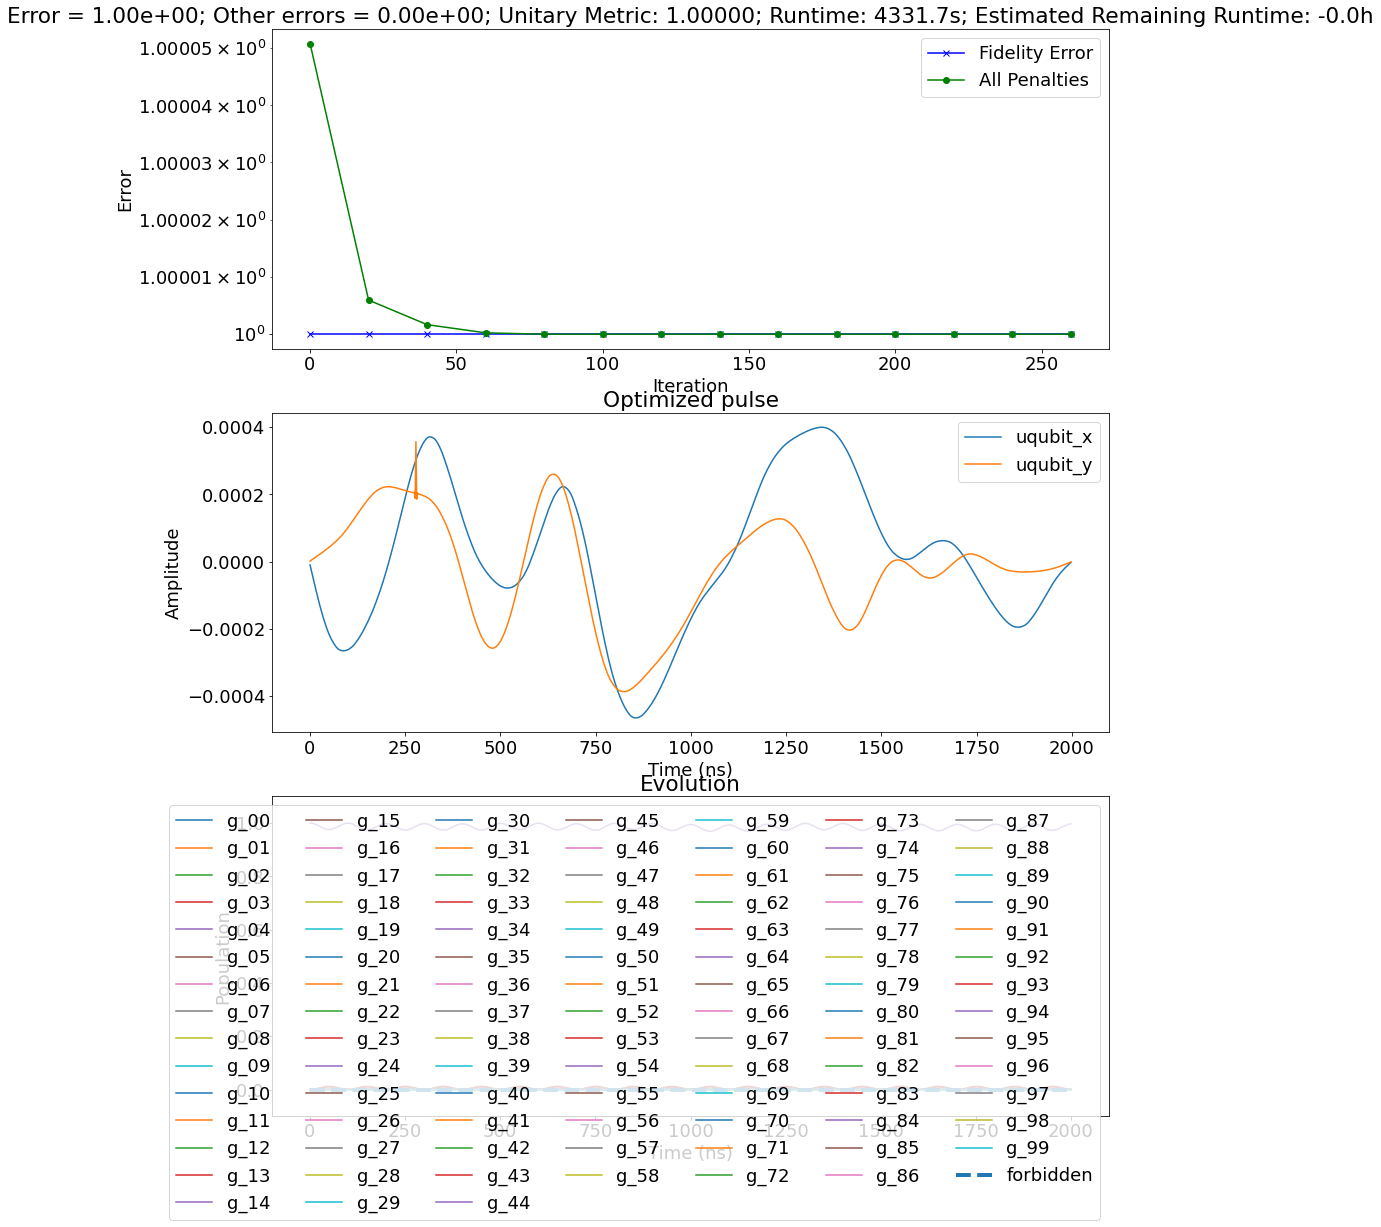

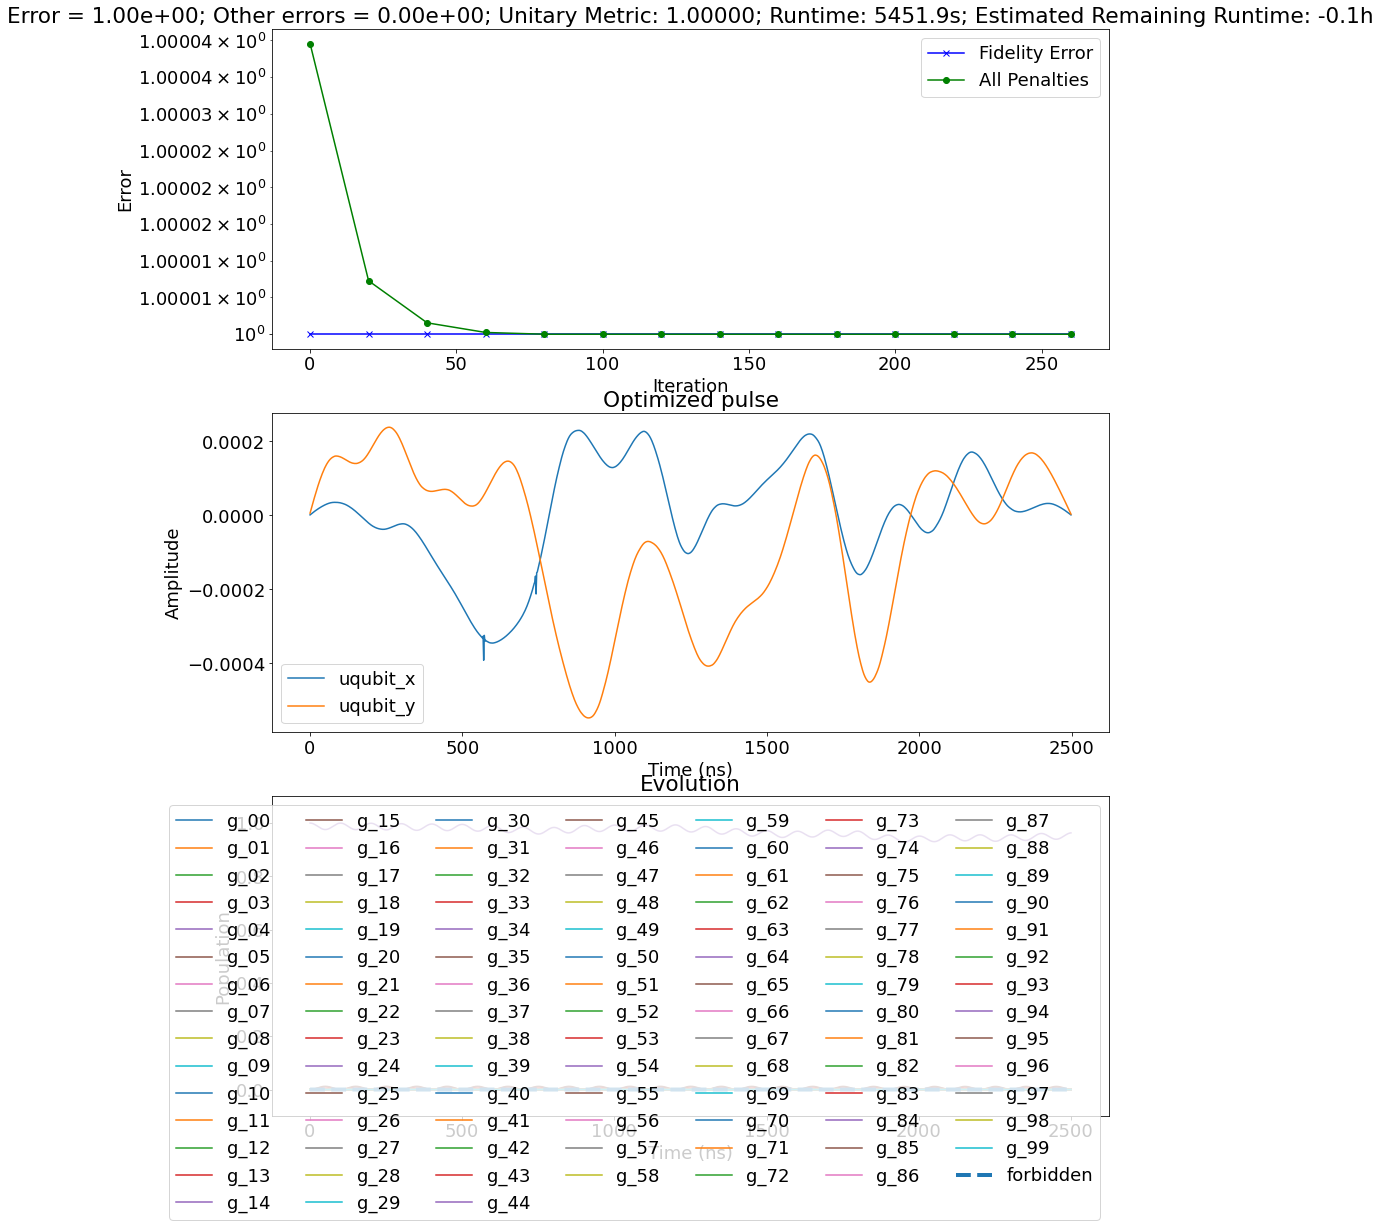

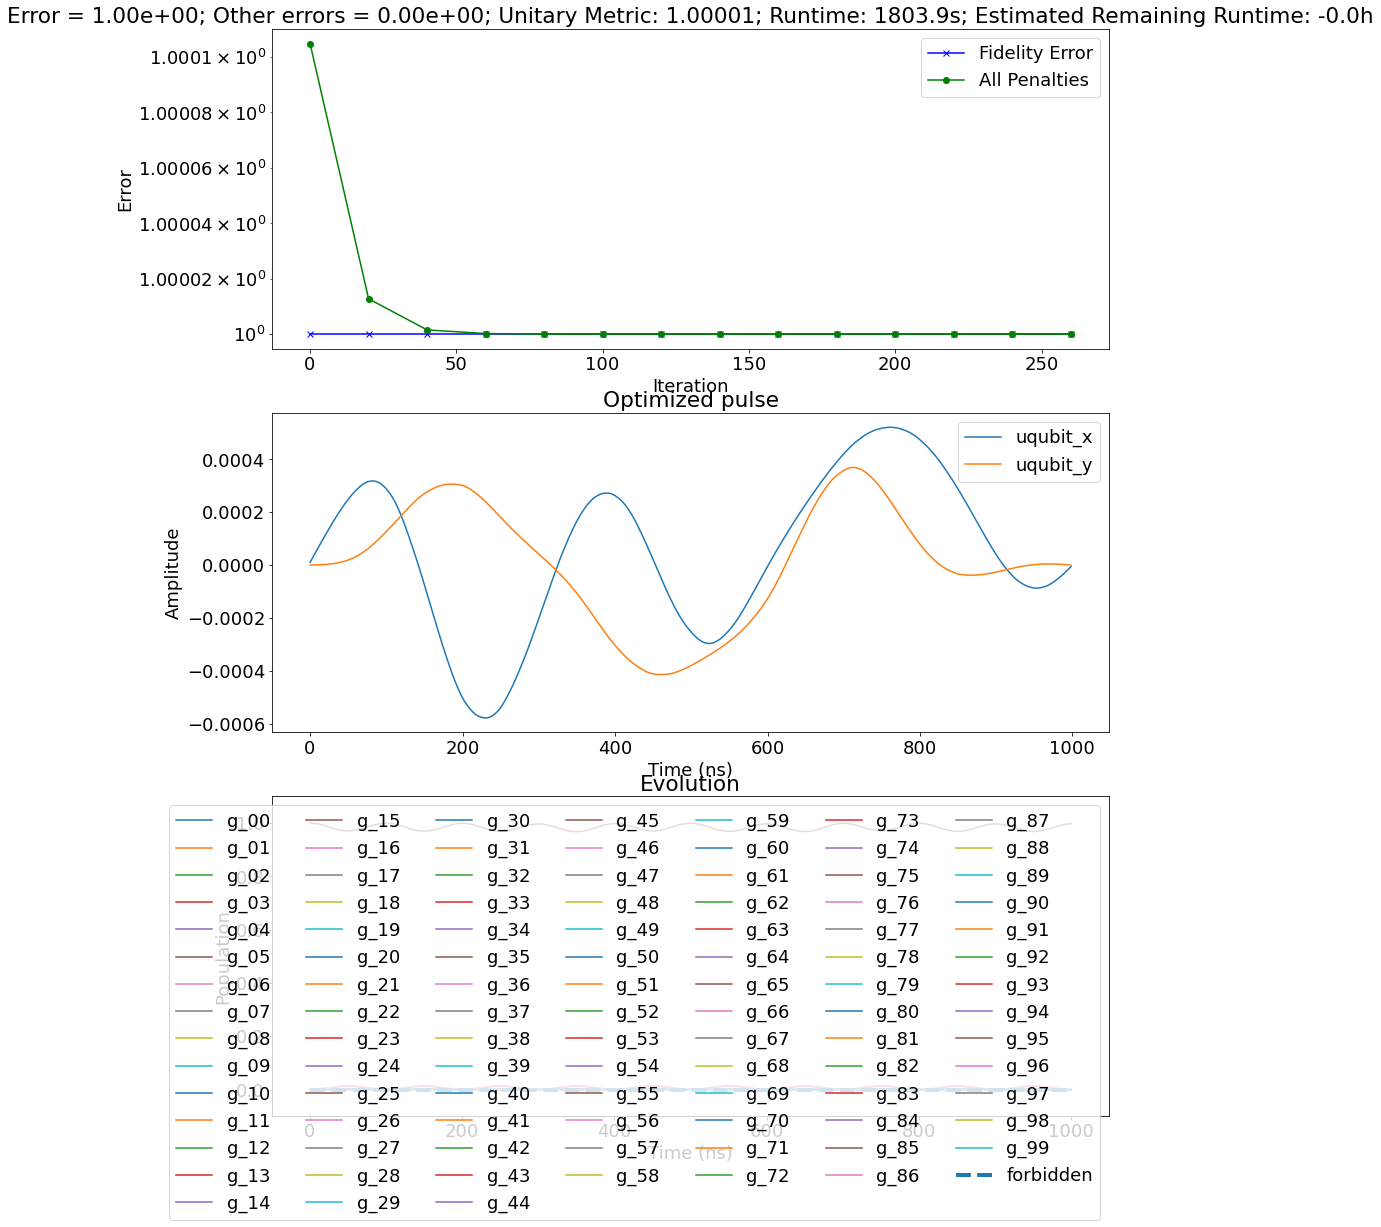

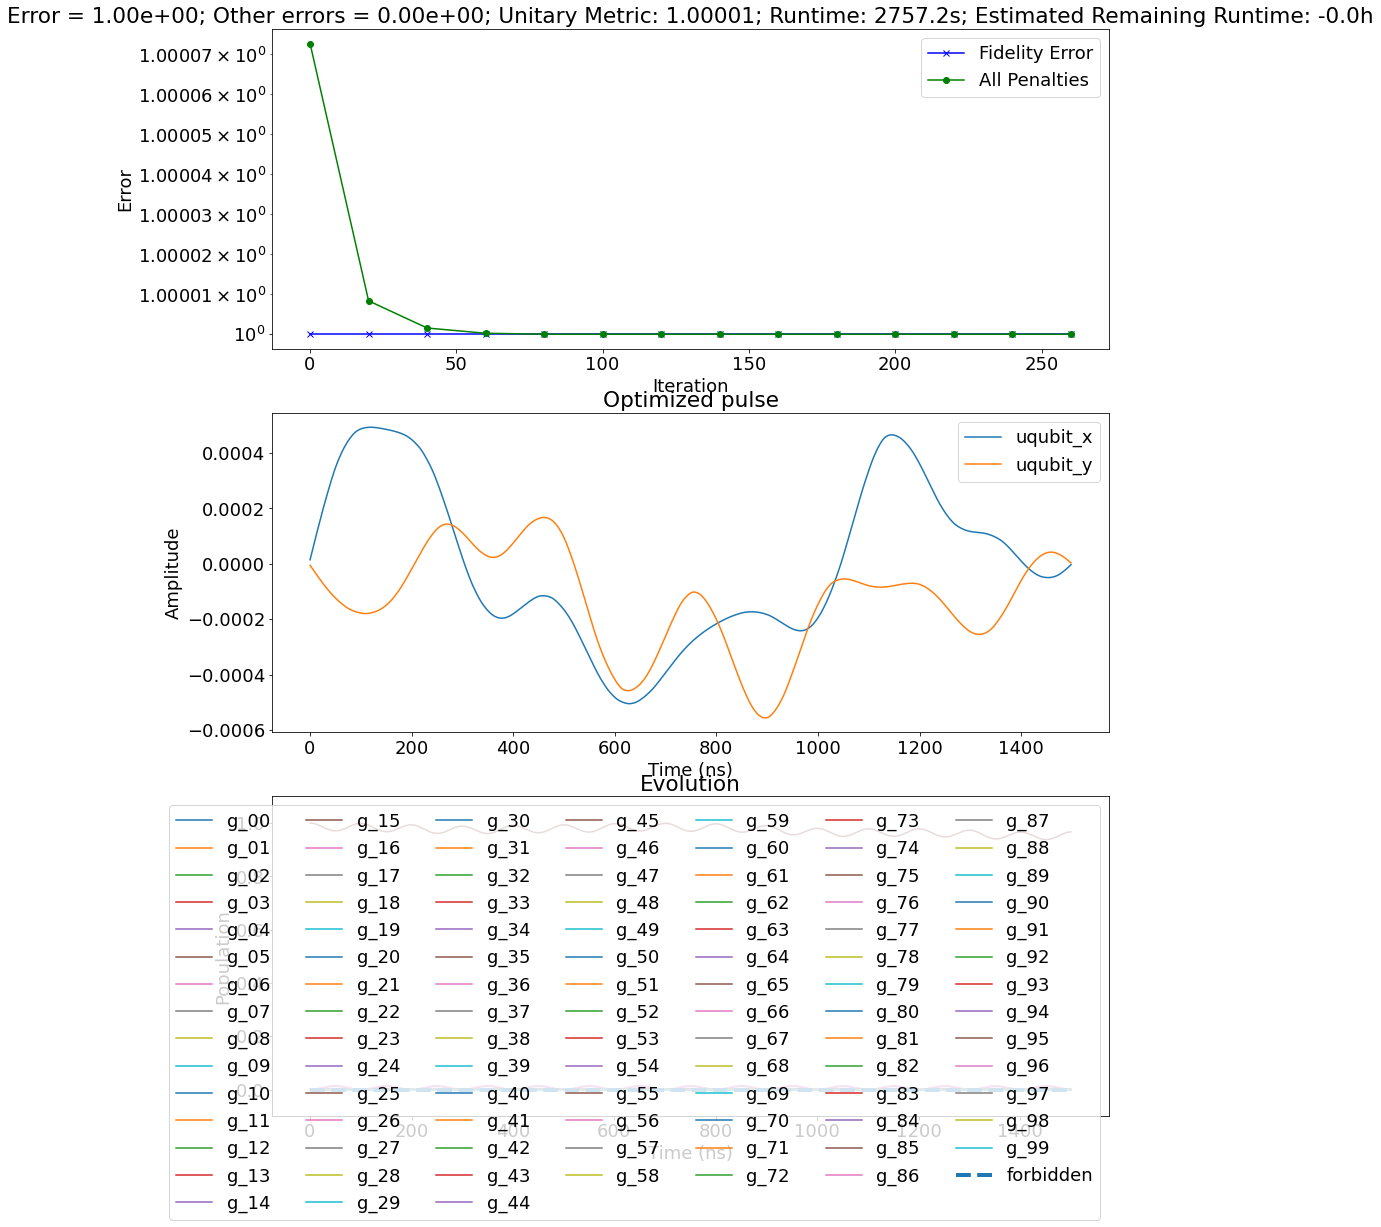

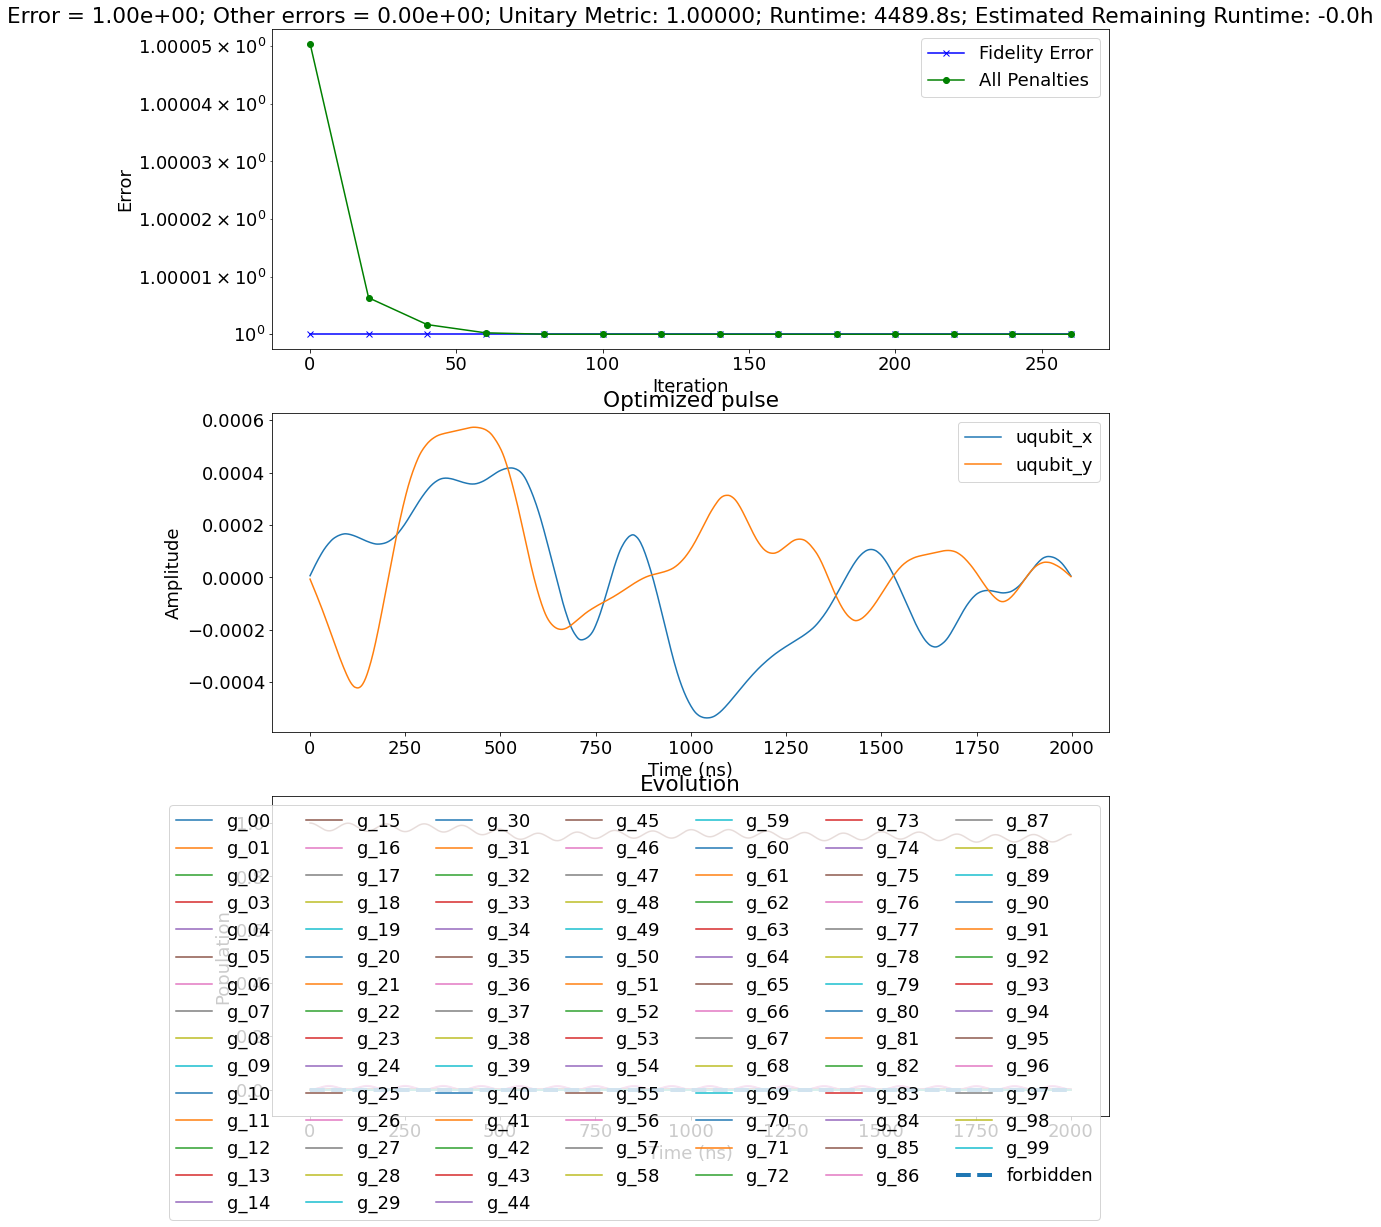

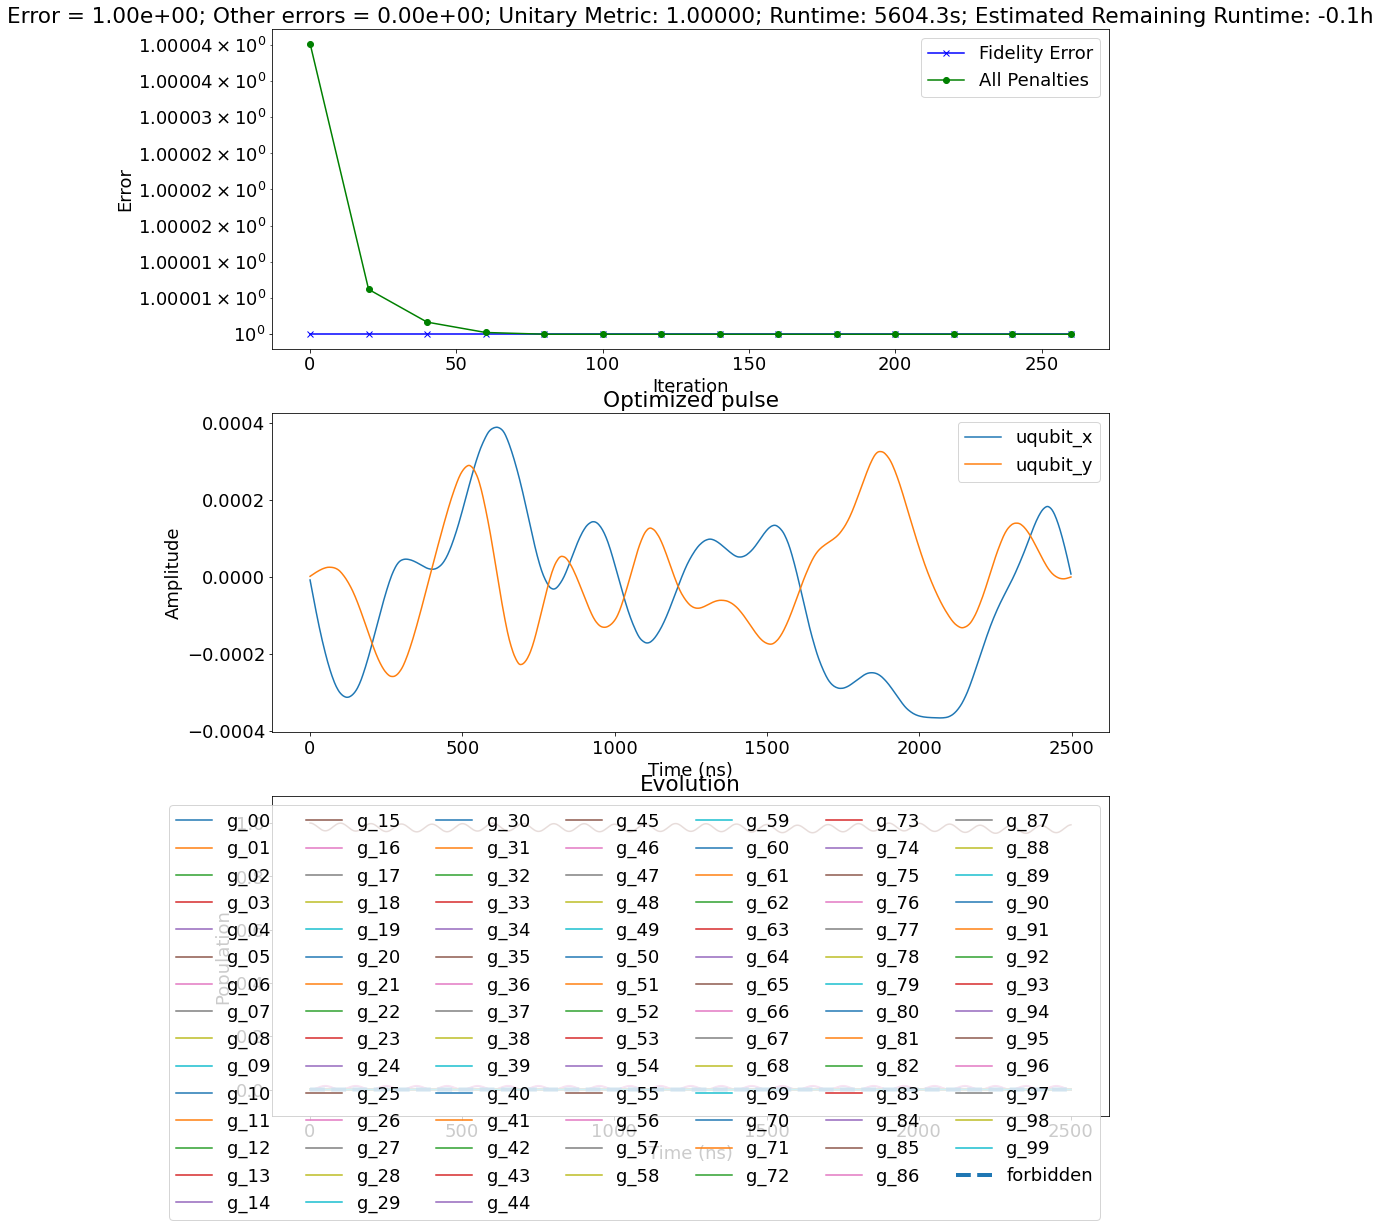

In [50]:
main()